# max cut

In [1]:
import pennylane as qml

from pennylane import qaoa
from pennylane.vqe.vqe import Hamiltonian

import pennylane,numpy as np
from matplotlib import pyplot as plt
import networkx as nx

In [34]:
n_wires=4
graph = [(0, 1), (0, 3), (1, 2), (2, 3)]

dev = qml.device("default.qubit", wires=n_wires, analytic=True, shots=10000)


H_cost = Hamiltonian(coeffs=[], observables=[])
for edge in graph:
    wire1 = edge[0]
    wire2 = edge[1]
    for i in range(1):
        H_cost -= qml.PauliZ(wire1) @ qml.PauliZ(wire2)

H_mixer = Hamiltonian(coeffs=[], observables=[])
for wire in range(n_wires):
    H_mixer += qml.PauliX(wire)
        
        
def qaoa_layer(gamma, beta):
    n = 1
    qml.templates.ApproxTimeEvolution(H_cost, gamma, n)
    qml.templates.ApproxTimeEvolution(H_mixer, beta, n)
    
    
def base_circuit(params, wires=None):
    gammas, betas = params
    depth=2
    for wire in range(n_wires):
        qml.Hadamard(wires=wire)    
    qml.layer(qaoa_layer, depth, gammas, betas)
    

@qml.qnode(dev)
def inference_circuit(params):
    base_circuit(params)
#     res = qml.Hermitian(np.diag(range(2 ** n_wires)), wires=range(n_wires))
    #return qml.sample(res)
    return qml.probs(wires=range(n_wires))
#     return qml.sample(comp_basis_measurement(range(n_wires)))
#     return [qml.sample(qml.PauliZ(i)) for i in range(n_wires)]

In [ ]:
# @qml.qnode(dev)
# def train_circuit(params, edge=None):
#     pauli_z = [[1, 0], [0, -1]]
#     pauli_z_2 = np.kron(pauli_z, pauli_z)
#     base_circuit(params)
#     return qml.expval(qml.Hermitian(pauli_z_2, wires=edge))

# def loss(params):
#     neg_obj = 0
#     for edge in graph:
#         neg_obj -= 0.5 * (1 - train_circuit(params, edge=edge))
#     return neg_obj


In [31]:
cost = qml.ExpvalCost(base_circuit, H_cost, dev)

def loss(params):
    return -cost(params)



In [32]:
params = 0.01 * np.random.rand(2, 2)
opt = qml.AdagradOptimizer(stepsize=0.5)

for i in range(30):
    params = opt.step(loss, params)
    print(loss(params))


-3.9083130254755054
-0.3185237560087665
-1.019128391661257
-1.6638639360135732
0.43657711533357235
-1.9289350591353283
-3.3636604424014713
-3.605477758142641
-2.8179392976905486
-2.369800772347249
-3.305426663740142
-3.7982604115379637
-3.7234622265300907
-3.549601226928349
-3.4861375114698694
-3.4839735445211186
-3.632213174704402
-3.694975544416353
-3.7547105390957434
-3.784169037881759
-3.8154084963914086
-3.8362009208899095
-3.8583522649821558
-3.8748181019617167
-3.891485886627414
-3.9044299645162392
-3.917036795871375
-3.927080438423372
-3.936621743895954
-3.944360732228496


In [35]:
inference_circuit(params)

tensor([5.39622384e-06, 1.21514897e-03, 1.21514897e-03, 1.04176006e-03,
        1.21514897e-03, 4.93050488e-01, 1.04176006e-03, 1.21514897e-03,
        1.21514897e-03, 1.04176006e-03, 4.93050488e-01, 1.21514897e-03,
        1.04176006e-03, 1.21514897e-03, 1.21514897e-03, 5.39622384e-06], requires_grad=True)

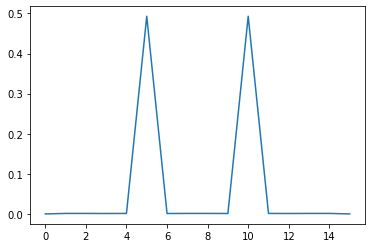

In [36]:
plt.plot(inference_circuit(params))

(array([ 326.,  147.,  931., 2676.,  934.,  169., 3421.,  168.,  883.,
         345.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

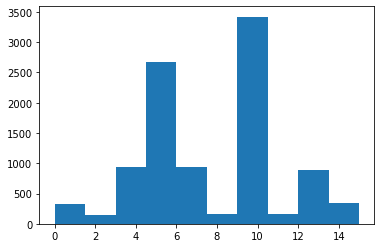

In [2]:
8550.1 / 0.3

28500.333333333336

In [4]:
(117 + 400 + 750 + 989 + 100) / 2 + (332 + 30 + 90 + 158 + 97 + 30)

1915.0